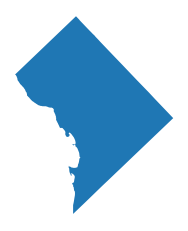

In [1]:
import folium
import openrouteservice as ors

%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps


import pandas as pd
import osmnx as ox
city = ox.geocode_to_gdf('Washington, D.C.')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

import heapq
import random, math

In [2]:
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.7
POPULATION_SIZE = 100
FITNESS = 0
TRUCKS = 5
DEPOT = None
CAPACITY = 100
INF = float("inf")

In [3]:
class PrioritySet(object):
    
    def __init__(self):
        self.heap = []
        self.set = set()

    def push(self, d):
        if not d in self.set:
            heapq.heappush(self.heap, d)
            self.set.add(d)

    def pop(self):
        d = heapq.heappop(self.heap)
        self.set.remove(d)
        return d

    def poop(self):
        d = self.heap[-1]
        self.heap = self.heap[:-1]
        self.set.remove(d)
        return d

    def size(self):
        return len(self.heap)

    def __str__(self):
        op = ""
        for i in self.heap:
            op += str(i[0]) + " : " + i[1].__str__()
            op += "\n"
        return op

    def __getitem__(self, index):
        return self.heap[index]

In [4]:
class Position:

    def __init__(self,x,y):
        self.x = x
        self.y = y		

    def __str__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ") "

    def x_coor(self):
        return self.x

    def y_coor(self):
        return self.y

In [5]:
class Vehicle:

    def __init__(self, capacity):
        self.capacity = capacity

    def capacity(self):
        return self.capacity

In [6]:
class Node:

    pos = Position(-1,-1)
    demand = 0

    def __init__(self,name):
        self.name = name

    def setPosition(self,x,y):
        self.pos = Position(x, y)

    def setDemand(self,d):
        self.demand = d

    def __str__(self):
        return "(" + str(self.pos.x) + ", " + \
                   str(self.pos.y) + " )"

In [7]:
def copy(li):
    return [i for i in li]

def getProb():
    return random.random()

def get_random(li):
    index = random.randint(0, len(li)-1)
    return li[index]

def get_distance(cus1, cus2):
    # Euclideian
    #change to vincenty later
    dist = 0 
    dist = math.sqrt(((cus1.pos.x - cus2.pos.x) ** 2) + ((cus1.pos.y - cus2.pos.y) ** 2))
    return dist

def print_tuple(t):
    print( "0"), 
    for i in t:
        print(i),        
    print( "0"),
    print (" -> f: " + str(get_fitness(t)))

def print_population(p):
    for i in p:
        for c in i:
            print(c),
        print("\n")
    
def print_population_heap(p):
    count = 1
    for i in p:
        print (count, " )  ")
        print_tuple(i[1])
        count += 1
        print("\n")



In [8]:
def mutate(chromosome):

    temp = [i for i in chromosome]
    
    if getProb() < MUTATION_RATE:
        left = random.randint(1, len(temp) - 2)
        right = random.randint(left, len(temp) - 1)   
        temp[left], temp[right] = temp[right], temp[left]
    return temp


In [9]:

def crossover(a,b):

    if getProb() < CROSSOVER_RATE:
        left = random.randint(1, len(a) - 2)
        right = random.randint(left, len(a) - 1)
        # print left, " ", right
        c1 = [c for c in a[0:] if c not in b[left:right+1]]
        # print len(c1)
        a1 = c1[:left] + b[left:right+1] + c1[left:]
        # print len(p1)
        c2 = [c for c in b[0:] if c not in a[left:right+1]]
        b1 = c2[:left] + a[left:right+1] + c2[left:]
        return a1, b1
        # print_tuple(a)
        # print_tuple(b)
        # print_tuple(p1)
        # print_tuple(p2)
        # raw_input()
    
    return a, b


In [10]:

def get_fitness(li):
    
    num_custo = len(li)
    fitness = 0

    for i in range(num_custo - 1):
        fitness += get_distance(li[i], li[i+1])

    fitness += get_distance(DEPOT, li[0])
    fitness += get_distance(li[-1], DEPOT)

    # chk for valid capacity
    temp = copy(li)
    temp.insert(0,DEPOT)
    temp.append(DEPOT)
    valid = 1
    curr_demand = 0
    for i in range(len(temp)):
        if temp[i] == DEPOT and curr_demand > CAPACITY:
            fitness = INF
        elif temp[i] == DEPOT:
            curr_demand = 0
        else:
            curr_demand += temp[i].demand

    return fitness

In [11]:

def getPopulationFitness(p):
    
    h = PrioritySet()
    for i in p:
        h.push((get_fitness(i),i))
    return h

def create_new():

    TempSet = copy(Nodes)
    chromosome = []
    while len(TempSet) > 0:
        index = (int)(getProb() * len(TempSet))
        chromosome.append(TempSet.pop(index))

    return chromosome 

In [12]:
def Genetic_Algo():
    
    print ("POPULATION GENERATED... EVOLUTION BEGINING ...")
    minimum_chrom = h[0]
    print( "Curr Min: ", minimum_chrom[0])
    count = 0
    # while h[0][0] > 1800:
    while count < 1000:
        ax = h.pop()
        bx = h.pop()
        a,b = crossover(list(ax[1]),list(bx[1]))
        a = mutate(a)
        while get_fitness(a) == INF:
            a = create_new()
        b = mutate(b)
        while get_fitness(b) == INF:
            b = create_new()
        if get_fitness(a) != INF:
            h.push((get_fitness(a),tuple(a)))
        else:
            h.push(ax)
        if get_fitness(b) != INF:
            h.push((get_fitness(b),tuple(b)))
        else:
            h.push(bx)

        while h.size() < POPULATION_SIZE:
            TempSet = copy(Nodes)
            chromosome = []
            count += 1
            while len(TempSet) > 0:
                index = (int)(getProb() * len(TempSet))
                chromosome.append(TempSet.pop(index))
            h.push((get_fitness(chromosome),tuple(chromosome)))
        count = count + 1
        
        if count % 1000 == 0:
            print (count),
            print (" Generation done")

        if h[0][0] < minimum_chrom[0]:
            minimum_chrom = h[0] 
            print ("CurrMin: ",)
            print (minimum_chrom[0])
    
    print_tuple(minimum_chrom[1])
    print (count)
    


In [13]:

def initialize_population():

    while len(population) < POPULATION_SIZE:
        TempSet = copy(Nodes)
        chromosome = []
        while len(TempSet) > 0:
            index = (int)(getProb() * len(TempSet))
            chromosome.append(TempSet.pop(index))

        if get_fitness(chromosome) != INF:
            population.add(tuple(chromosome))

C:\Users\Monty\.conda\envs\ox\lib\site-packages\osmnx\simplification.py:417: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = utils_graph.graph_to_gdfs(G, edges=False)["geometry"].buffer(tolerance).unary_union
C:\Users\Monty\.conda\envs\ox\lib\site-packages\osmnx\simplification.py:466: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


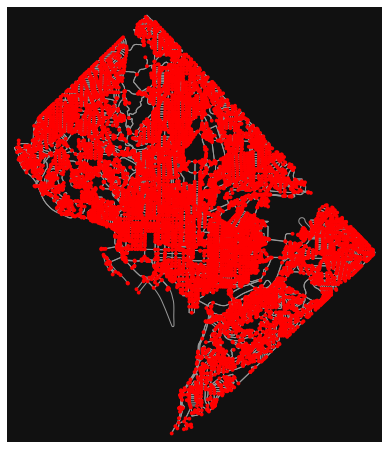

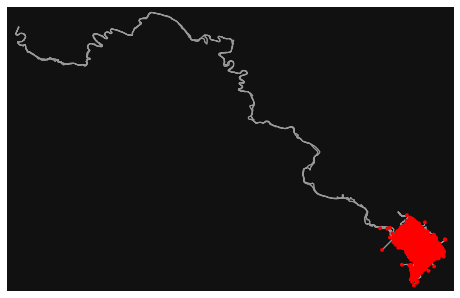

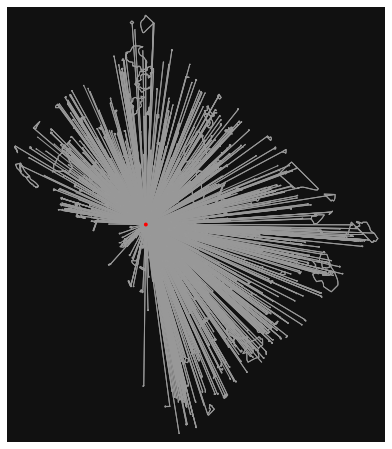

In [15]:
G = ox.project_graph(ox.graph_from_place('Washington D.C., USA', network_type='drive'))


G1 = ox.graph_from_xml("district-of-columbia-latest.osm.bz2")

G2 = ox.consolidate_intersections(G1, tolerance=10, rebuild_graph=True, dead_ends=True)

fig, ax = ox.plot_graph(G, node_color="r")

fig, ax = ox.plot_graph(G1, node_color="r")

fig, ax = ox.plot_graph(G2, node_color="r")

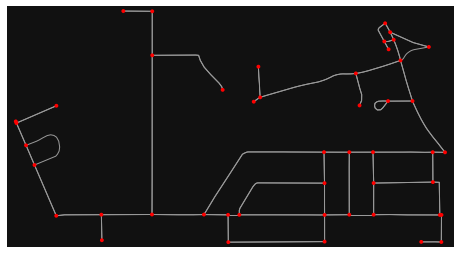

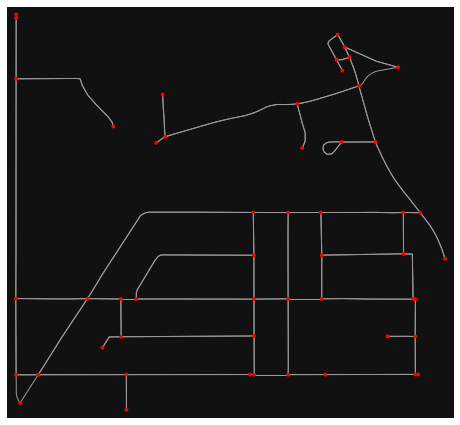

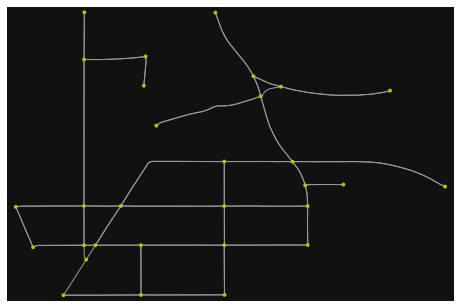

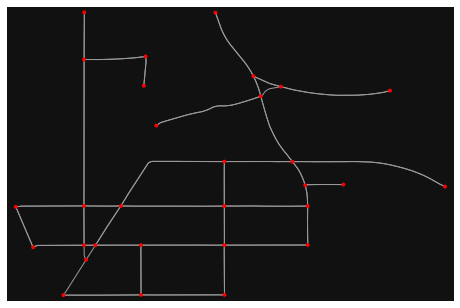

In [42]:
north, south, east, west = 38.937679, 38.941212, -77.075133, -77.066525

north1, south1, east1, west1 = 38.941243, 38.936841, -77.072454, -77.066446


# north1, south1, east1, west1 = 38.942077, 38.935472, -77.072418, -77.066453

# create network from that bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
G0 = ox.graph_from_bbox(north1, south1, east1, west1, network_type="drive_service")
G1 = ox.graph.graph_from_bbox(north1, south1, east1, west1, network_type='drive', 
                              simplify=True, retain_all=True, truncate_by_edge=True, 
                              clean_periphery=True, custom_filter=None)
G2 = ox.graph.graph_from_bbox(north1, south1, east1, west1, network_type='drive', 
                              simplify=True, retain_all=False, truncate_by_edge=True, 
                              clean_periphery=True, custom_filter=None)

# G3 = ox.graph.graph_from_bbox(north1, south1, east1, west1, network_type='drive', 
#                               simplify=False, retain_all=True, truncate_by_edge=True,
#                               clean_periphery=True, custom_filter=None)
# G4 = ox.graph.graph_from_bbox(north1, south1, east1, west1, network_type='drive', 
#                               simplify=False, retain_all=False, truncate_by_edge=True, 
#                               clean_periphery=True, custom_filter=None)
fig, ax = ox.plot_graph(G, node_color="r") #Big box unsimplified
fig, ax = ox.plot_graph(G0, node_color="r") #Choosing a smaller box 
fig, ax = ox.plot_graph(G1, node_color="y") #Simplifying the small box
fig, ax = ox.plot_graph(G2, node_color="r")

In [43]:
G1.nodes


NodeView((49735507, 49748328, 49748340, 49748353, 49753268, 49753270, 49753272, 49753274, 49753280, 49756456, 49768086, 49774596, 49774604, 49774723, 49774762, 49780129, 49780193, 49784202, 49789979, 49789983, 49802368, 49802377, 49802395, 49805645, 49843926, 49843934, 49858900, 49869544, 49876232, 49884932))

In [44]:
df = pd.DataFrame()
Nodes = []

In [45]:
df = pd.DataFrame()
Nodes = []

In [46]:
Nodes = []
for i in G1.nodes:
    Nodes.append(i)
df = pd.DataFrame(Nodes)
df.rename(columns = {0:'Nodes'}, inplace = True)

In [47]:
df = pd.DataFrame(Nodes)
df.rename(columns = {0:'Nodes'}, inplace = True)

In [48]:
lats = []
longs = []

for i in Nodes:
    lats.append(G1.nodes[i].get('y'))
    longs.append(G1.nodes[i].get('x'))
    
df['Latitude'] = lats
df['Longitude'] = longs

In [49]:
df.head()

,Nodes,Latitude,Longitude
0,49735507,38.936283,-77.072975
1,49748328,38.937335,-77.066387
2,49748340,38.938151,-77.066389
3,49748353,38.938586,-77.066455
4,49753268,38.937332,-77.068636


In [50]:
df1 = pd.DataFrame()
Nodes = []

Nodes = []
for i in G1.nodes:
    Nodes.append(i)
df1 = pd.DataFrame(Nodes)
df1.rename(columns = {0:'Nodes'}, inplace = True)

df1 = pd.DataFrame(Nodes)

df1.rename(columns = {0:'Nodes'}, inplace = True)

lats = []
longs = []

for i in Nodes:
    lats.append(G1.nodes[i].get('y'))
    longs.append(G1.nodes[i].get('x'))
    
df1['Latitude'] = lats
df1['Longitude'] = longs

df1.head()

subset = df1[['Latitude', 'Longitude']]
tuples = [tuple(x) for x in subset.to_numpy()]

print(tuples)

[(38.936283, -77.072975), (38.937335, -77.066387), (38.938151, -77.066389), (38.938586, -77.066455), (38.937332, -77.068636), (38.937332, -77.070886), (38.937331, -77.072112), (38.93733, -77.072418), (38.937287, -77.073793), (38.938602, -77.065426), (38.93856, -77.062684), (38.941291, -77.07076), (38.941226, -77.072418), (38.940573, -77.064167), (38.940656, -77.067109), (38.940455, -77.067653), (38.939839, -77.07047), (38.936288, -77.070882), (38.9422087, -77.0688763), (38.942216, -77.072411), (38.937027, -77.072362), (38.938154, -77.071426), (38.940676, -77.070807), (38.936289, -77.06863), (38.939083, -77.066799), (38.939085, -77.068636), (38.938152, -77.068636), (38.938155, -77.072423), (38.938136, -77.07426), (38.940876, -77.067852)]


In [51]:
len(tuples)

30

In [55]:

def create_data_array():
    locations = tuples
    
    
    

#     locations = [(38.936283, -77.072975), (38.937335, -77.066387), 
#                  (38.938151, -77.066389), (38.938586, -77.066455), 
#                  (38.937332, -77.068636), (38.937332, -77.070886), 
#                  (38.937331, -77.072112), (38.93733, -77.072418), 
#                  (38.937287, -77.073793), (38.938602, -77.065426), 
#                  (38.93856, -77.062684), (38.941291, -77.07076), 
#                  (38.941226, -77.072418), (38.940573, -77.064167), 
#                  (38.940656, -77.067109), (38.940455, -77.067653), 
#                  (38.939839, -77.07047), (38.936288, -77.070882), 
#                  (38.9422087, -77.0688763), (38.942216, -77.072411), 
#                  (38.937027, -77.072362), (38.938154, -77.071426), 
#                  (38.940676, -77.070807), (38.936289, -77.06863), 
#                  (38.939083, -77.066799), (38.939085, -77.068636), 
#                  (38.938152, -77.068636), (38.938155, -77.072423), 
#                  (38.938136, -77.07426), (38.940876, -77.067852)]
    
#     locations = [[82, 76], [96, 44], [50, 5], [49, 8], [13, 7], [29, 89], [58, 30], [84, 39],
#                 [14, 24], [12, 39], [3, 82], [5, 10], [98, 52], [84, 25], [61, 59], [1, 65],
#                 [88, 51], [91, 2], [19, 32], [93, 3], [50, 93], [98, 14], [5, 42], [42, 9],
#                 [61, 62], [9, 97], [80, 55], [57, 69], [23, 15], [20, 70], [85, 60], [98, 5]]

    demands =  [0, 19, 21, 6, 19, 
                7, 12, 16, 6, 16, 
                8, 14, 21, 16, 3, 
                22, 18, 19, 1, 24, 
                8, 12, 4, 8, 24, 
                24, 2, 20, 15, 2]


    for i in range(1,len(locations)):
        c = Node(i)
        c.setPosition(locations[i][0],locations[i][1])
        c.setDemand(demands[i])
        Nodes.append(c)
    
    i = 0
    c = Node(i)
    c.setPosition(locations[i][0],locations[i][1])
    c.setDemand(demands[i])
    global DEPOT
    DEPOT = c

    for j in range(TRUCKS-1):
        Nodes.append(DEPOT)


In [56]:
Nodes = []
population = set()

if __name__ == '__main__':
    create_data_array()
    initialize_population()
    # print_population(population)
    h = getPopulationFitness(population)
    # print_population_heap(h)
    Genetic_Algo()

POPULATION GENERATED... EVOLUTION BEGINING ...
Curr Min:  0.12826445009805224
CurrMin: 
0.12362603416663638
CurrMin: 
0.11673258468993161
CurrMin: 
0.11359467135312358
CurrMin: 
0.11113729387819261
1000
 Generation done
0
(38.936288, -77.070882 )
(38.938136, -77.07426 )
(38.938155, -77.072423 )
(38.936283, -77.072975 )
(38.93733, -77.072418 )
(38.941291, -77.07076 )
(38.941226, -77.072418 )
(38.937331, -77.072112 )
(38.938151, -77.066389 )
(38.938586, -77.066455 )
(38.936283, -77.072975 )
(38.937027, -77.072362 )
(38.940676, -77.070807 )
(38.9422087, -77.0688763 )
(38.942216, -77.072411 )
(38.939839, -77.07047 )
(38.938152, -77.068636 )
(38.937287, -77.073793 )
(38.936283, -77.072975 )
(38.938154, -77.071426 )
(38.939085, -77.068636 )
(38.940455, -77.067653 )
(38.939083, -77.066799 )
(38.936283, -77.072975 )
(38.936289, -77.06863 )
(38.93856, -77.062684 )
(38.940573, -77.064167 )
(38.937335, -77.066387 )
(38.937332, -77.070886 )
(38.937332, -77.068636 )
(38.938602, -77.065426 )
(38.940